# Exercises on Attention
In the following exercises, we will take a look at dot product attention, we will use word embeddings for this, however these would in the context of encoder-decoder models be hidden states from the decoder and encoder.

In [1]:
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-50")

1) Calculate the dot product between two word embeddings that you believe are similar

In [3]:
import numpy as np
np.dot(model["goose"], model["duck"])

16.078485

2) Calculate the dot product between the two word and a word which you believe is dissimilar

In [4]:
np.dot(model["goose"], model["moose"])
np.dot(model["duck"], model["moose"])

11.842581

3) make the three words into a matrix $E$ and multiply it with its own transpose using matrix multiplication. So $E \cdot E^T$
  - what do the entries in the matrix correspond to? What do you imagine the dot product is? *Hint*, the similarity between vectors (cosine similarity) is exactly the same as the dot product assuming you normalize the length of each vector to 1.

Following the article by Lindsay et al (2020) this is one way (out of many) to implement the attention mechanism denoted ${\tilde{\alpha_t}} = \phi(h_{t-1}, c) = h_{t-1} \cdot c^T$ (3.1) called dot product attention. 


In [6]:
E = model["goose", "duck", "moose"]

E @ E.T

array([[20.631552, 16.078485, 14.530851],
       [16.078485, 23.134829, 11.84258 ],
       [14.530851, 11.84258 , 16.661507]], dtype=float32)

4) Assume $h_{t-1}$ our previous hidden state is the word vector for "hei", calculate the attention the $h_{t-1}$ and the embeddings $\mathcal{E}_{greetings}$, $\mathcal{E}_{hello}$, $\mathcal{E}_{jungle}$. Remember that the attention weight is given by $\boldsymbol{\alpha_t} = softmax(\boldsymbol{\tilde{\alpha_t}})$ (3.2).


In [36]:
from torch.nn.functional import softmax
import torch


ht = model["hei"]

E = model["greetings", "hello", "jungle"]

attn_ = ht @ E.T
attn_ = torch.tensor(attn_)

attention = softmax(attn_)
attention = attention.view(1, 3)

<ipython-input-36-9103eb445928>:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  attention = softmax(attn_)


5) The matrix resulting from the softmax is referred to as the attention matrix and is how much each embedding should be weighted (paid attention to) when we multiply our attention matrix by our matrix embeddings consisting of $\mathcal{E}_{greetings}$, $\mathcal{E}_{hello}$, $\mathcal{E}_{jungle}$. Try it out:


In [37]:
matrix_from_5 = attention @ E

- 5.1) This is essentially a weighted sum, one way to see this is to extract the weight from the first row of the matrix

In [40]:
attn = attention[0] # first row of our attention matrix
print(attn)
weighted = attn[0] * model["greetings"] + attn[1] * model["hello"] + attn[2] * model["jungle"]

# compare the weighted embedding with the first column in the matrix from 5).

matrix_from_5[0] - weighted < 000.1

tensor([0.1684, 0.7876, 0.0441])


tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True])

  - 6.1) Examine the attention matrix, which words have a higher attention weight and why?

*Hint* you can plot the matrix using:
```
H = model["man", "banana"]
C = model[["woman", "apple", "pineapple"]
wieghted, attn = attention(H, C)

import matplotlib.pyplot as plt
plt.matshow(attn)
plt.show()
```

In [53]:
def attention(query, value, scale=False):
    "Compute (Scaled) Dot Product Attention'"
    query = torch.tensor(query)
    value = torch.tensor(value)
    d_k = query.shape[-1]
    if scale:
        scores = torch.matmul(query, value.T) / np.sqrt(d_k)
    else:
        scores = torch.matmul(query, value.T) 
    p_attn = softmax(scores)
    return torch.matmul(p_attn, value), p_attn

<ipython-input-53-60fba23f5a71>:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  p_attn = softmax(scores)


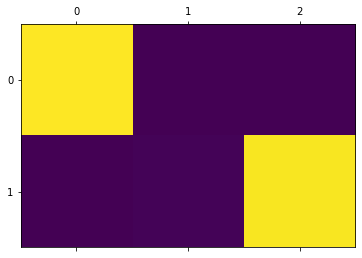

In [54]:
H = model["man", "banana"]
C = model["woman", "apple", "pineapple"]
scores, attn = attention(H, C)

import matplotlib.pyplot as plt
plt.matshow(attn)
plt.show()

<ipython-input-53-60fba23f5a71>:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  p_attn = softmax(scores)


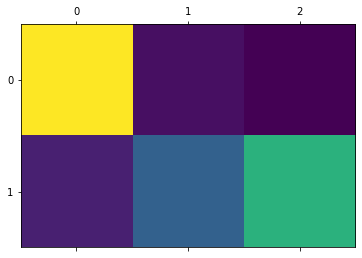

In [55]:

scores, attn = attention(H, C, scale = True)

import matplotlib.pyplot as plt
plt.matshow(attn)
plt.show()